In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import sys

ALPHABET = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
COST = 0 #to index cost
PREVIOUS = 1 #to index previous node

In [2]:
def read_input(path):
    start_node = None
    nodes_wieghts = None
    
    with open(path) as f:
        start_node = f.readline() 
        nodes_wieghts = json.loads(f.readline())
    
    return start_node.strip('\n'), nodes_wieghts

In [3]:
def input_2_graph(json_nodes):
    G = nx.Graph()
    G.add_nodes_from(n for n in json_nodes.keys())
    for node,edges in json_nodes.items():
        for idx in range(len(edges)):
            weight = edges[idx]
            if weight == 0:
                continue
            else:
                dest = ALPHABET[idx]
                G.add_edge(node, dest, color='b', weight = weight)
    return G

In [4]:
def graph_2_dict(graph):
    result = {}
    for node in graph:
        result[node] = {k:graph[node][k]['weight'] for k in list(graph.neighbors(node))}
    return result

In [5]:
def display_graph(graph, pos, alpha = 1.0):
    labels = nx.get_edge_attributes(graph,'weight')
    colors = nx.get_edge_attributes(graph,'color').values()
    widths = nx.get_edge_attributes(graph,'width').values()
    nx.draw(graph, pos, edge_color=colors, node_size=800, width=list(widths), with_labels=True, font_weight='bold')
    nx.draw_networkx_edge_labels(graph ,pos, edge_labels=labels)
    nx.draw_networkx_edges(graph, pos, alpha = alpha)
    plt.show()

In [6]:
def dijkstra(graph, starting_node, pos):
    visited = {}
    unvisited = {}
    G = nx.Graph()
    # adding all nodes to unvisited
    for node in graph.keys():
        # setting cost to infinity and previous node to None
        unvisited[node] = [sys.maxsize, None]

    # set start node cost queal to 0
    unvisited[starting_node][COST] = 0
    
    # repeat these steps until unvisited dict became empty
    while unvisited:
                
        # set a node with minimum cost as a current node
        current_node = min(unvisited, key=unvisited.get)
        print(f'Make node {current_node} permanent . . . . ')
        #add the current node and its neighbors to graph a object
        G.add_node(current_node)
        G.add_nodes_from(graph[current_node].keys())
        
        # testing neighbours cost
        for neighbor in graph[current_node].keys():
            # if we didnt visited this node before
            if neighbor not in visited:
                G.add_edge(current_node, neighbor, color = '#B1ABA9', weight = graph[current_node][neighbor], width = 2)
                # then we need to calculate node's new cost
                cost = unvisited[current_node][COST] + graph[current_node][neighbor]
                # if is less than the cost we know about the node
                if cost < unvisited[neighbor][COST]:
                    # remove edges that had larger cost
                    if unvisited[neighbor][PREVIOUS]:
                        # condition to hande root node border case
                        G.add_edge(neighbor, unvisited[neighbor][PREVIOUS], color = '#B1ABA9', width = 2)
                    # then update the cost and new parent node
                    unvisited[neighbor][COST] = cost 
                    unvisited[neighbor][PREVIOUS] = current_node
                    # add its neighbors edges
                    G.add_edge(current_node, neighbor, color='r', width = 6)

        # add current node to visited nodes dict and remove it from unvisiteds
        visited[current_node] = unvisited[current_node]
        del unvisited[current_node]
        
        display_graph(G, pos, alpha=0.5)
    
    return visited

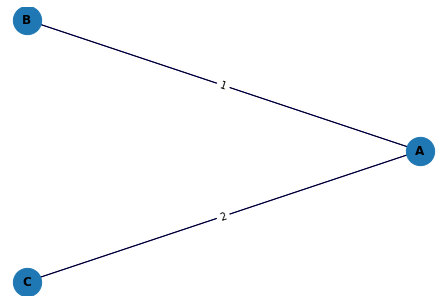

In [11]:
start, nodes = read_input("test1.txt")
graph = input_2_graph(nodes)
pos = nx.circular_layout(graph)
display_graph(graph, pos)


Make node A permanent . . . . 


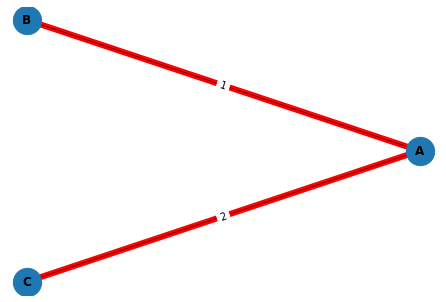

Make node B permanent . . . . 


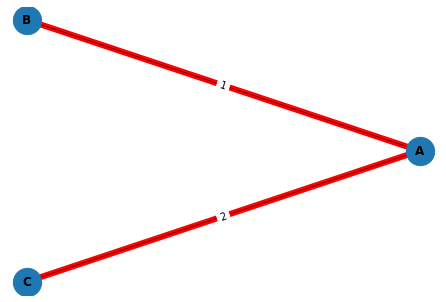

Make node C permanent . . . . 


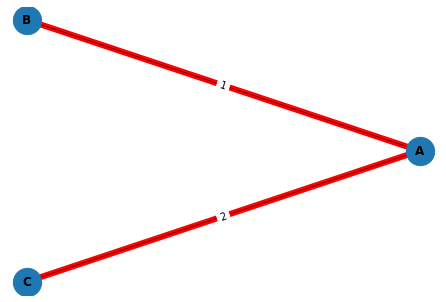

In [12]:
graph_dict = graph_2_dict(graph)
print(graph)
path = dijkstra(graph_dict, start, pos)